<a href="https://colab.research.google.com/github/EvgeniaKantor/Hackathon-1/blob/main/AudienceDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.4 MB/s eta 0:00:00


In [27]:
from faker import Faker
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Description of the Code**

This Python script generates realistic cosmetic customer profiles with the following attributes:

Name (Gender-specific)

Gender (80% Female, 20% Male)

Age (12 to 90, with a normal distribution peaking around 40)

Skin Type (Randomly chosen from 5 types)

Cosmetic Features (1 to 3 features, customized by age)

**Key Libraries Used:**

**Faker:**

Generates realistic names.
Uses name_female() and name_male() to match the gender.

**random:**

Chooses gender with an 80% female and 20% male distribution.

**numpy (np):**

Generates age using a normal distribution centered at 40, with most ages between 20 and 60.
Ensures age stays within the 12 to 90 range.
Randomly selects Skin Type and Cosmetic Features.

**scipy.stats:**

Performs T-tests, Chi-square tests, and computes skewness & kurtosis.

**matplotlib.pyplot:**

Creates pie charts, bar plots, and stacked bar charts.

**seaborn:**

Enhances visualization with aesthetic styling and KDE plots.

**Detailed Functionality:**

Gender and Name:

Gender is selected with 80% Female and 20% Male probability.
Faker is used to generate a gender-appropriate name.
Age Distribution:

Follows a normal distribution with:

Mean (μ) = 40
Standard Deviation (σ) = 15
Clipped to stay within 12 and 90 to avoid extreme ages.
Skin Type:

Randomly selects one from:

['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

Cosmetic Features:

1 to 3 features are randomly selected from:

['Anti-aging', 'Anti-acne', 'Hydrating', 'Anti-dark spots', 'Day Care', 'Night Care', 'Sun Protect']

Age-based customization:

If 12 to 18 → 'Anti-acne' is added.

If over 30 → 'Anti-aging' is added.

If under 25 → 'Anti-aging' is explicitly removed (to avoid unrealistic profiles).

# Data Generation & Manipulation

In [28]:
# Initialize Faker
fake = Faker()

# Possible choices
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
cosmetic_features = ['Anti-aging', 'Anti-acne', 'Hydrating', 'Anti-dark spots', 'Day Care', 'Night Care', 'Sun Protect']

# Function to generate name with gender, age, skin type, and cosmetic features
def generate_profile():
    # 80% chance for Female, 20% for Male
    gender = random.choices(['Female', 'Male'], weights=[80, 20], k=1)[0]
    name = fake.name_female() if gender == 'Female' else fake.name_male()

    # Age with Normal Distribution: Mean=40, SD=15, Clipped between 12 and 90
    age = int(np.clip(np.random.normal(40, 15), 12, 90))

    # Random Skin Type (one choice only)
    skin_type = np.random.choice(skin_types)

    # Random Cosmetic Features (1 to 3 features)
    num_features = np.random.randint(1, 4)
    features = set(np.random.choice(cosmetic_features, size=num_features, replace=False))

    # Add 'Anti-acne' if age between 12 and 18 and it's not already included
    if 12 <= age <= 18:
        features.add('Anti-acne')

    # Add 'Anti-aging' if age > 30 and it's not already included
    if age > 30:
        features.add('Anti-aging')

    # Ensure 'Anti-aging' is NOT included for ages under 25
    if age < 25 and 'Anti-aging' in features:
        features.remove('Anti-aging')

    # Convert the set to a sorted list and then to a string
    features = ', '.join(sorted(features))

    return {
        'Name': name,
        'Gender': gender,
        'Age': age,
        'Skin Type': skin_type,
        'Cosmetic Features': features
    }

# Generate a list of profiles
num_profiles = 200  # Number of profiles to generate
profiles = [generate_profile() for _ in range(num_profiles)]

# Create DataFrame from the list of profiles
df_profiles = pd.DataFrame(profiles)

# Display the DataFrame
df_profiles.head()

,Name,Gender,Age,Skin Type,Cosmetic Features
0,Rachel Wright,Female,60,Oily,"Anti-aging, Anti-dark spots, Night Care"
1,Jamie Kim,Female,17,Normal,"Anti-acne, Hydrating, Night Care"
2,Dawn Graham,Female,27,Oily,"Anti-dark spots, Hydrating, Sun Protect"
3,Lindsey Miranda,Female,43,Combination,"Anti-aging, Sun Protect"
4,Wendy Marquez,Female,46,Normal,"Anti-aging, Hydrating"


In [29]:
# One-Hot Encode 'Cosmetic Features'
df_features = df_profiles['Cosmetic Features'].str.get_dummies(sep=', ')

# One-Hot Encode 'Skin Type'
df_skin_types = pd.get_dummies(df_profiles['Skin Type'], prefix='Skin Type').astype(int)

# Concatenate the original DataFrame with the one-hot encoded features and skin types
df_encoded = pd.concat([df_profiles, df_features, df_skin_types], axis=1)

# Display the updated DataFrame
df_encoded.head()

,Name,Gender,Age,Skin Type,Cosmetic Features,Anti-acne,Anti-aging,Anti-dark spots,Day Care,Hydrating,Night Care,Sun Protect,Skin Type_Combination,Skin Type_Dry,Skin Type_Normal,Skin Type_Oily,Skin Type_Sensitive
0,Rachel Wright,Female,60,Oily,"Anti-aging, Anti-dark spots, Night Care",0,1,1,0,0,1,0,0,0,0,1,0
1,Jamie Kim,Female,17,Normal,"Anti-acne, Hydrating, Night Care",1,0,0,0,1,1,0,0,0,1,0,0
2,Dawn Graham,Female,27,Oily,"Anti-dark spots, Hydrating, Sun Protect",0,0,1,0,1,0,1,0,0,0,1,0
3,Lindsey Miranda,Female,43,Combination,"Anti-aging, Sun Protect",0,1,0,0,0,0,1,1,0,0,0,0
4,Wendy Marquez,Female,46,Normal,"Anti-aging, Hydrating",0,1,0,0,1,0,0,0,0,1,0,0


In [30]:
#Overview and Cleaning
print("Data Overview:")
print(df_encoded.head())
print("\nData Information:")
print(df_encoded.info())
print("\nMissing Values:")
print(df_encoded.isnull().sum())
print("\nBasic Statistics:")
print(df_encoded.describe())

Data Overview:
              Name  Gender  Age    Skin Type  \
0    Rachel Wright  Female   60         Oily   
1        Jamie Kim  Female   17       Normal   
2      Dawn Graham  Female   27         Oily   
3  Lindsey Miranda  Female   43  Combination   
4    Wendy Marquez  Female   46       Normal   

                         Cosmetic Features  Anti-acne  Anti-aging  \
0  Anti-aging, Anti-dark spots, Night Care          0           1   
1         Anti-acne, Hydrating, Night Care          1           0   
2  Anti-dark spots, Hydrating, Sun Protect          0           0   
3                  Anti-aging, Sun Protect          0           1   
4                    Anti-aging, Hydrating          0           1   

   Anti-dark spots  Day Care  Hydrating  Night Care  Sun Protect  \
0                1         0          0           1            0   
1                0         0          1           1            0   
2                1         0          1           0            1   
3        

# Data Visualization

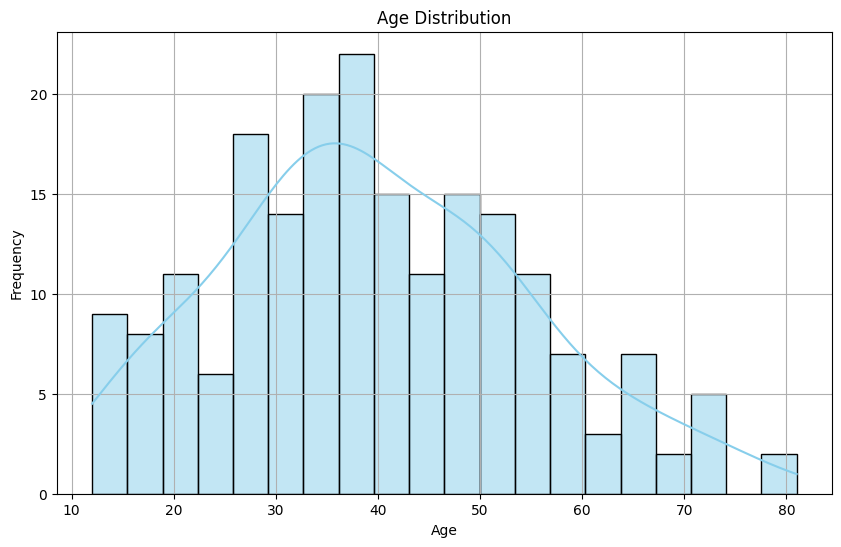

In [31]:
# Demographic Analysis
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Age'], bins=20, color='skyblue', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

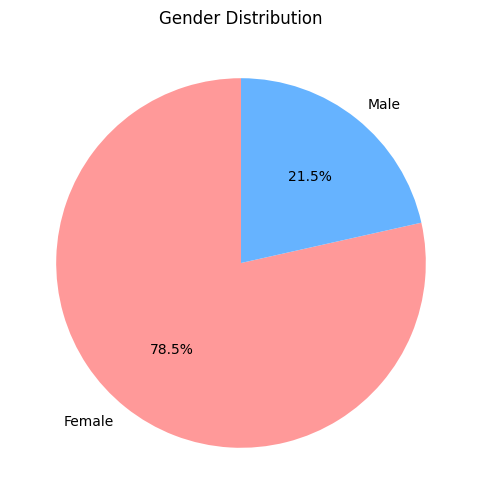

In [32]:
# Gender Distribution
plt.figure(figsize=(6, 6))
gender_counts = df_encoded['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

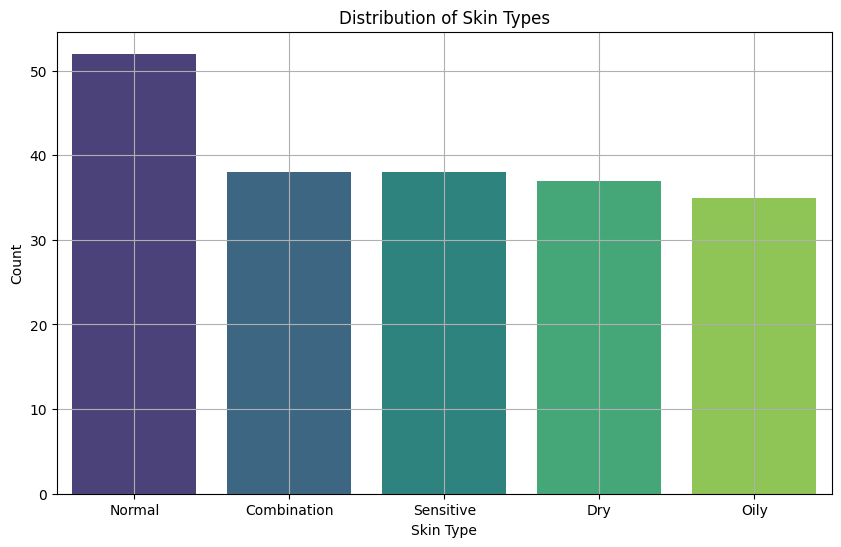

In [33]:
# Count occurrences of each Skin Type
skin_type_counts = df_encoded['Skin Type'].value_counts().sort_values(ascending=False)

# Plot sorted bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, hue=skin_type_counts.index, palette='viridis')

# Labels and title
plt.title('Distribution of Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.grid(True)

# Show plot
plt.show()

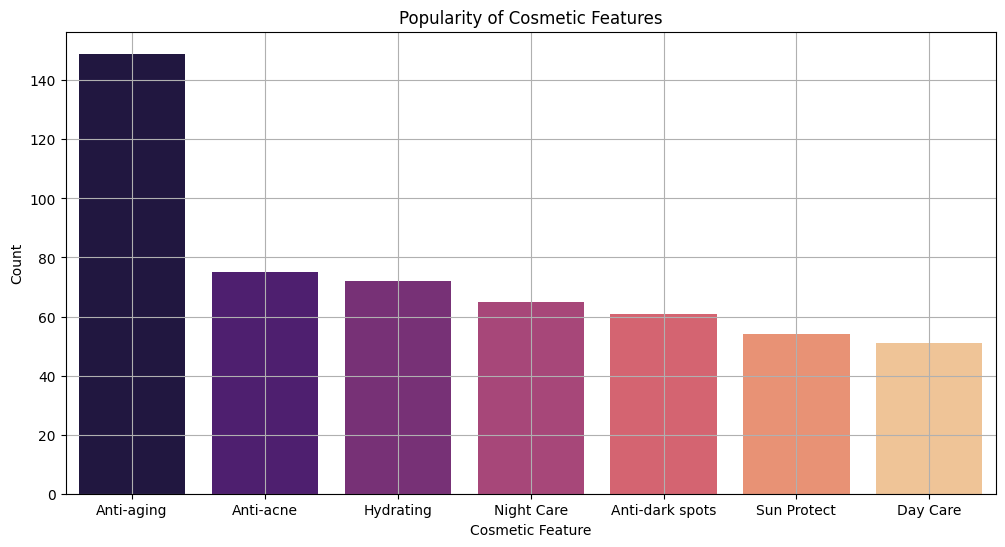

In [34]:
# Popular Cosmetic Features
cosmetic_features = df_encoded[['Anti-acne', 'Anti-aging', 'Anti-dark spots', 'Day Care', 'Hydrating', 'Night Care', 'Sun Protect']]
feature_counts = cosmetic_features.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, hue=feature_counts.index, palette='magma')
plt.title('Popularity of Cosmetic Features')
plt.xlabel('Cosmetic Feature')
plt.ylabel('Count')
plt.grid(True)
plt.show()

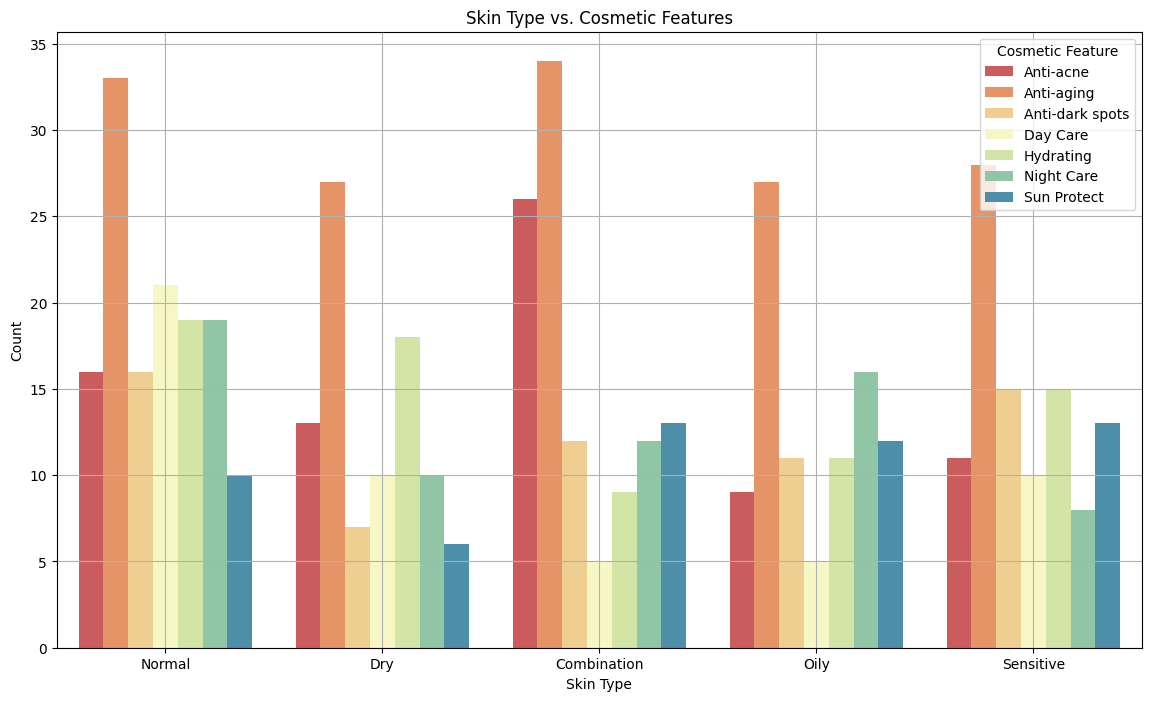

In [35]:
# Cross-analysis of Skin Type vs. Cosmetic Features
skin_feature_df = pd.melt(df_encoded, id_vars=['Skin Type'], value_vars=['Anti-acne', 'Anti-aging', 'Anti-dark spots', 'Day Care', 'Hydrating', 'Night Care', 'Sun Protect'])
skin_feature_df = skin_feature_df[skin_feature_df['value'] == 1]
plt.figure(figsize=(14, 8))
sns.countplot(x='Skin Type', hue='variable', data=skin_feature_df, palette='Spectral')
plt.title('Skin Type vs. Cosmetic Features')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.legend(title='Cosmetic Feature')
plt.grid(True)
plt.show()

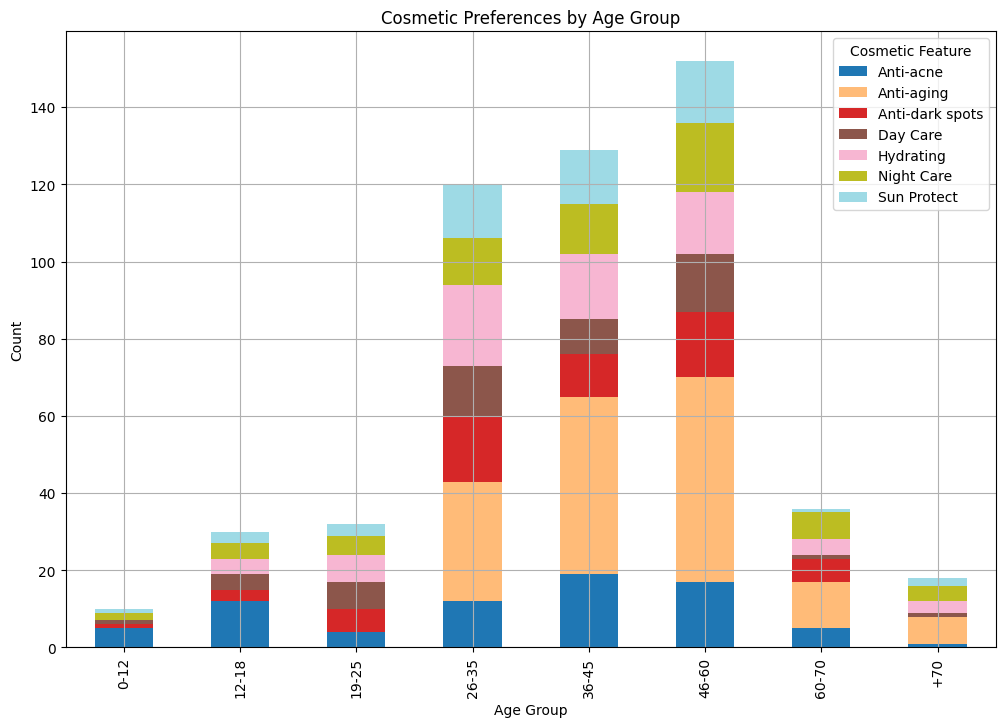

In [36]:
# Create Age Groups
df_encoded['Age Group'] = pd.cut(df_encoded['Age'],
                                 bins=[0, 12, 18, 25, 35, 45, 60, 70, 100],
                                 labels=['0-12', '12-18', '19-25', '26-35', '36-45', '46-60', '60-70', '+70'],
                                 include_lowest=True)

# Group by Age Group with observed=True to avoid the FutureWarning
age_group_features = df_encoded.groupby('Age Group', observed=True)[['Anti-acne', 'Anti-aging',
                                                                     'Anti-dark spots', 'Day Care',
                                                                     'Hydrating', 'Night Care',
                                                                     'Sun Protect']].sum()

# Plot Stacked Bar Chart
age_group_features.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Labels and Title
plt.title('Cosmetic Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cosmetic Feature')
plt.grid(True)

# Show Plot
plt.show()

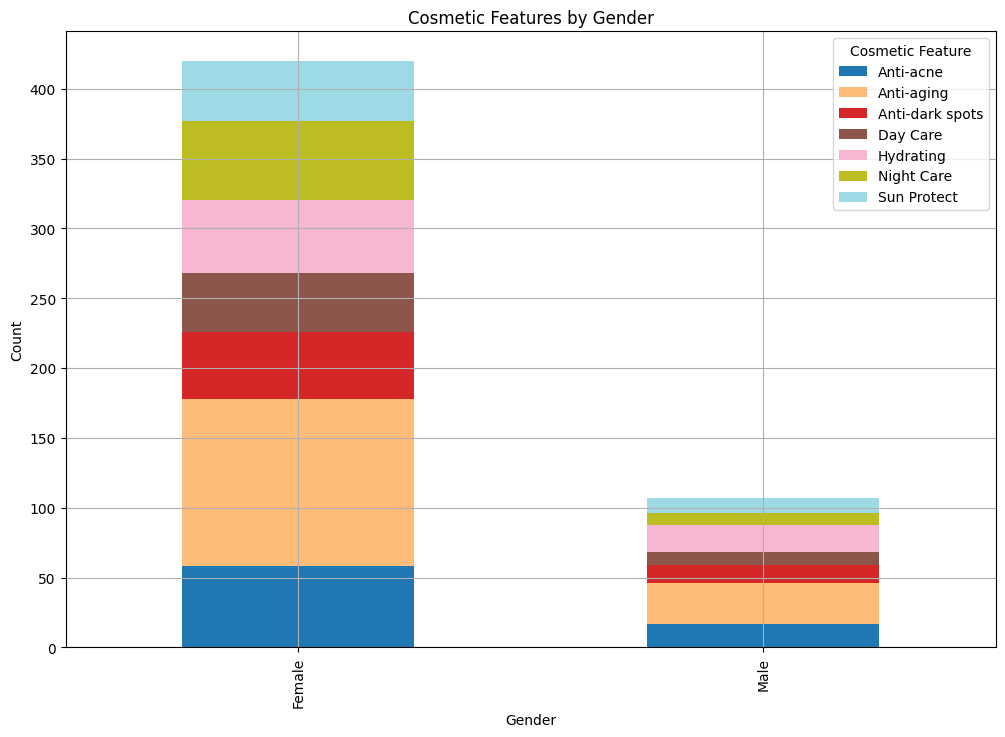

In [37]:
# Gender Differences in Cosmetic Feature Choices
gender_features = df_encoded.groupby('Gender')[['Anti-acne', 'Anti-aging', 'Anti-dark spots', 'Day Care', 'Hydrating', 'Night Care', 'Sun Protect']].sum()
gender_features.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Cosmetic Features by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cosmetic Feature')
plt.grid(True)
plt.show()

# Statistical Analysis & Hypothesis Testing

In [38]:
# Descriptive Statistics
print("Descriptive Statistics for Age:")
print("Mean Age:", np.mean(df_encoded['Age']))
print("Median Age:", np.median(df_encoded['Age']))
# print("Mode Age:", stats.mode(df_encoded['Age'])[0][0])
print("Variance:", np.var(df_encoded['Age']))
print("Standard Deviation:", np.std(df_encoded['Age']))
print("Skewness:", stats.skew(df_encoded['Age']))
print("Kurtosis:", stats.kurtosis(df_encoded['Age']))

Descriptive Statistics for Age:
Mean Age: 39.75
Median Age: 38.0
Variance: 227.0275
Standard Deviation: 15.067431765234579
Skewness: 0.32255367574307453
Kurtosis: -0.3283071876803261


In [39]:
# Hypothesis Testing
# T-test: Age distribution by Gender
age_female = df_encoded[df_encoded['Gender'] == 'Female']['Age']
age_male = df_encoded[df_encoded['Gender'] == 'Male']['Age']

t_stat, p_value = stats.ttest_ind(age_female, age_male, equal_var=False)
print("\nT-test for Age Difference between Genders:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in age distributions between genders.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in age distributions between genders.")


T-test for Age Difference between Genders:
T-Statistic: 2.147795769142975
P-Value: 0.03470233686594898
Reject the null hypothesis. There is a significant difference in age distributions between genders.


In [40]:
# Chi-Square Test: Gender vs. Cosmetic Feature Choices
# Create a contingency table for Gender and onehot encoded features
cosmetic_features = ['Anti-acne', 'Anti-aging', 'Anti-dark spots', 'Day Care', 'Hydrating', 'Night Care', 'Sun Protect']
gender_feature_table = pd.crosstab(df_encoded['Gender'], [df_encoded[feature] for feature in cosmetic_features])

chi2, p, dof, ex = stats.chi2_contingency(gender_feature_table)
print("\nChi-Square Test for Gender and Cosmetic Feature Choices:")
print("Chi2 Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)


Chi-Square Test for Gender and Cosmetic Feature Choices:
Chi2 Statistic: 60.28172193184784
P-Value: 0.7359514469736325
Degrees of Freedom: 68


Chi2 Statistic: There isn't a strong association between gender and cosmetic feature choices.

P-Value: p is much higher than the common alpha level (e.g., 0.05).
Degrees of Freedom: indicates the complexity of the contingency table used for this test.

Conclusion:

Fail to Reject the Null Hypothesis: There is no statistically significant association between gender and the choice of cosmetic features in this dataset.
In other words, gender does not appear to influence cosmetic feature preferences in this sample.

# Correlation & Outlier Detection


Spearman Correlation:
                      Age  Anti-acne  Anti-aging  Anti-dark spots  Day Care  \
Age              1.000000  -0.121686    0.748845        -0.008185 -0.081692   
Anti-acne       -0.121686   1.000000   -0.162907         0.047668 -0.145135   
Anti-aging       0.748845  -0.162907    1.000000         0.013828 -0.105145   
Anti-dark spots -0.008185   0.047668    0.013828         1.000000 -0.038744   
Day Care        -0.081692  -0.145135   -0.105145        -0.038744  1.000000   
Hydrating       -0.042956  -0.064550    0.008604        -0.089595 -0.056402   
Night Care       0.114217   0.057883    0.112052        -0.065502 -0.161036   
Sun Protect     -0.014050  -0.075606    0.045735        -0.133805 -0.149092   

                 Hydrating  Night Care  Sun Protect  
Age              -0.042956    0.114217    -0.014050  
Anti-acne        -0.064550    0.057883    -0.075606  
Anti-aging        0.008604    0.112052     0.045735  
Anti-dark spots  -0.089595   -0.065502    -0.1338

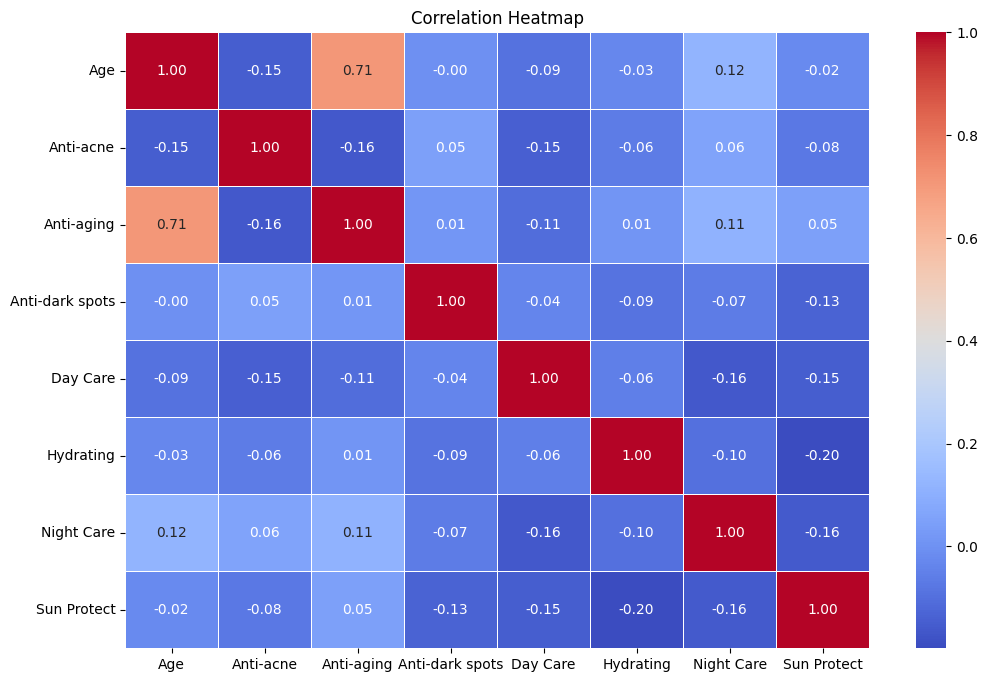

In [41]:
# Correlation Analysis
# Spearman and Pearson Correlation between Age and Cosmetic Features
print("\nSpearman Correlation:")
print(df_encoded[['Age'] + cosmetic_features].corr(method='spearman'))

print("\nPearson Correlation:")
print(df_encoded[['Age'] + cosmetic_features].corr(method='pearson'))

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded[['Age'] + cosmetic_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Q1: 29.0, Q3: 50.0, IQR: 21.0
Lower Bound: -2.5, Upper Bound: 81.5
Number of Outliers: 0
Empty DataFrame
Columns: [Name, Gender, Age]
Index: []


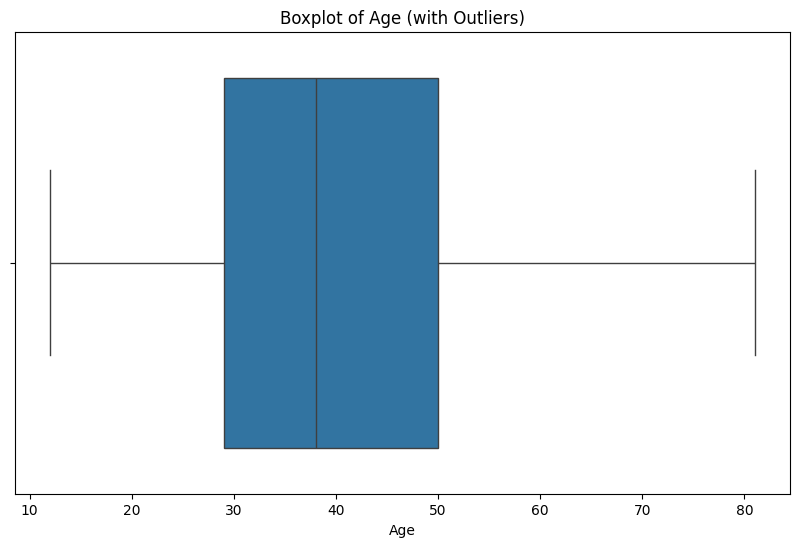

In [42]:
# Calculate Q1 and Q3
Q1 = np.percentile(df_encoded['Age'], 25)
Q3 = np.percentile(df_encoded['Age'], 75)

# Calculate IQR
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Define Outlier Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Detect Outliers
outliers = df_encoded[(df_encoded['Age'] < lower_bound) | (df_encoded['Age'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers[['Name', 'Gender', 'Age']])

# Plot to Visualize Outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encoded['Age'])
plt.title('Boxplot of Age (with Outliers)')
plt.show()

In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   200 non-null    object  
 1   Gender                 200 non-null    object  
 2   Age                    200 non-null    int64   
 3   Skin Type              200 non-null    object  
 4   Cosmetic Features      200 non-null    object  
 5   Anti-acne              200 non-null    int64   
 6   Anti-aging             200 non-null    int64   
 7   Anti-dark spots        200 non-null    int64   
 8   Day Care               200 non-null    int64   
 9   Hydrating              200 non-null    int64   
 10  Night Care             200 non-null    int64   
 11  Sun Protect            200 non-null    int64   
 12  Skin Type_Combination  200 non-null    int64   
 13  Skin Type_Dry          200 non-null    int64   
 14  Skin Type_Normal       200 non-null    int

In [45]:
#save audience data to excel

df_encoded.to_excel('audience_data.xlsx', index=False)

# Creating audience profile

In [46]:
# Most Popular Age (using Mode)
most_popular_age = df_encoded['Age'].mode()[0]
print(f"Most Popular Age: {most_popular_age}")

# Most Popular Gender
most_popular_gender = df_encoded['Gender'].mode()[0]
print(f"Most Popular Gender: {most_popular_gender}")

# Most Popular Skin Type
most_popular_skin_type = df_encoded[['Skin Type_Combination', 'Skin Type_Dry', 'Skin Type_Normal', 'Skin Type_Oily', 'Skin Type_Sensitive']].sum().idxmax().split('_')[1]
print(f"Most Popular Skin Type: {most_popular_skin_type}")

# Most Popular Cosmetic Features (Multiple possible)
cosmetic_feature_cols = ['Anti-acne', 'Anti-aging', 'Hydrating', 'Anti-dark spots', 'Day Care', 'Night Care', 'Sun Protect']
most_popular_features = df_encoded[cosmetic_feature_cols].sum().sort_values(ascending=False).head(3).index.tolist()
print(f"Most Popular Cosmetic Features: {most_popular_features}")

Most Popular Age: 38
Most Popular Gender: Female
Most Popular Skin Type: Normal
Most Popular Cosmetic Features: ['Anti-aging', 'Anti-acne', 'Hydrating']


In [47]:
# Store popular audience characteristics
audience_profile = {
    'Age': most_popular_age,
    'Gender': most_popular_gender,
    'Skin Type': most_popular_skin_type,
    'Cosmetic Features': most_popular_features
}

print("Audience Profile:", audience_profile)

Audience Profile: {'Age': 38, 'Gender': 'Female', 'Skin Type': 'Normal', 'Cosmetic Features': ['Anti-aging', 'Anti-acne', 'Hydrating']}
